# Capstone Project - Battle of the Neighborhoods
## Coursera Applied Data Science Capstone

### Table of Contents
- [__Introduction__](#Introduction)
- [__Data__](#Data)
    - [Jacksonville](#Jacksonville)
    - [Denver](#Denver)
        - [Foursquare](#Foursquare)
    - [Merged](#Merged)
- [__Methodology__](#Methodology)
- [__Analysis__](#Analysis)
    - [City Clustering](#Clustering)
    - [Food Trucks](#Trucks)
- [__Discussion and Conclusion__](#Discussion)

<a id = 'Introduction'></a>
<font size="4">__1. Introduction__</font> <br> <br><font size=3>Here we will determine if a city is an idea location for a food truck. This will target owners interested in opening a franchise in an addtional city or looking at a start up. The restaurant business is a fast-moving <br>field that ebbs and flows with low profit margins. Investing resources to expand into new markets is a high risk even for the most experienced restauranter. Here we will examine charteristies of a city that has <br>successful food truck business culture and determine if another city is a prime location.</font>

<a id = 'Data'></a>
<font size="4">__2. Data__</font> <br> <br><font size=3>The control city, Denver, data will be used to determine if similar neighbourhood charteristics are present in a target city, Jacksonville, to assess the viability of an enterprise.

Factors that will be investigated within the neighbourhoods of Denver with a thriving food truck culture are: 
* Arts and Entertainment
 * Music and Sports
* College and University
* Nightlife
* Outdoors and Recreation
* Food Trucks    

Data sources nessacary to generate information will include:
* City neighourhood name from denvergov.org and Wikipedia 
* City neighourhoods geolocations from Positionstack
* Venue types for clutering from Foursquare 

<a id = 'Jacksonville'></a>
<br><font size="4">__2.1__ Jacksonville, FL Neighborhood Data </font><br><br>
<font size=3>Here we scrape the Wikipedia page https://en.wikipedia.org/wiki/Neighborhoods_of_Jacksonville for the table of Jacksonville neighborhoods. 
<br><br>

In [1]:
import numpy as np
import pandas as pd 
from bs4 import BeautifulSoup
import requests

In [2]:
url = 'https://en.wikipedia.org/wiki/Neighborhoods_of_Jacksonville'
page = requests.get(url)
soup = BeautifulSoup(page.text, 'html.parser')

tables = soup.find_all('table')
for table in tables:
    if 'Neighborhoods of Jacksonville' in table.text:
        headers = [header.text.strip() for header in table.find_all('th')]
        rows = []
        table_rows = table.find_all('tr')    
        for row in table_rows:
           td = row.find_all('td')
           row = [row.text for row in td]
           rows.append(row)

headers.remove('vteNeighborhoods of Jacksonville')        
print(rows)

[[], ['\nBrooklyn\nLaVilla\nSouthbank\n', ''], ['\nNew Town\nTallulah-North Shore\nOrtega\nRiverside and Avondale\nSan Marco\nSpringfield\n'], ['\nArlington\nNorthside\n'], ['\nBayard\nGarden City\nLake Shore\nMandarin\nOakleaf Plantation\nOceanway\nSandalwood\n'], ['\nAtlantic Beach\nJacksonville Beach\nMayport\nNeptune Beach\n'], ['\nCategory\n']]


<br><font size=3>The Wikipedia table genreates a list of lists which needs to be combined and extra characters removed. However, the table was not complete and addtional names are added manually to generate the list of Jacksonville neighborhoods.<br><br>

In [3]:
#Combine list of lists
rows = sum(rows,[])

#Removes new line charater and splits into separte element 
rows2 = []
for element in rows:
   rows2 += element.split('\n')

rows2 = [x.strip() for x in rows2]

#Removes blank elements from list
rows2 = list(filter(None,rows2))

#Removes extra elements and splits hybrid names
rows2.remove('Category')
rows3 = rows2[6].split(' and ')
rows2.remove('Riverside and Avondale')

#Add additional alternitve neighborhood names
rows4 = ['Downtown', 'Eastside', 'Oakland', 'Fairfield', 'St. Nicholas', 'Brentwood', 'Panama Park', 'Riverview', 'Lake Shore', 'Murray Hill', 'Durkeeville', 'Southside']
rows = rows2 + rows3 + rows4

print(rows)

['Brooklyn', 'LaVilla', 'Southbank', 'New Town', 'Tallulah-North Shore', 'Ortega', 'San Marco', 'Springfield', 'Arlington', 'Northside', 'Bayard', 'Garden City', 'Lake Shore', 'Mandarin', 'Oakleaf Plantation', 'Oceanway', 'Sandalwood', 'Atlantic Beach', 'Jacksonville Beach', 'Mayport', 'Neptune Beach', 'Riverside', 'Avondale', 'Downtown', 'Eastside', 'Oakland', 'Fairfield', 'St. Nicholas', 'Brentwood', 'Panama Park', 'Riverview', 'Lake Shore', 'Murray Hill', 'Durkeeville', 'Southside']


<br><font size="3">Here we create a function to make repeated calls to obtain the neighborhoods and geolocation data from Positionstack. The function generates 5 results per element. This was choosen based on empirical evidence to ensure each locality was found.<br><br>

In [4]:
! pip install retry_requests

In [5]:
import json 
from retry_requests import retry
from requests import Session

In [6]:
# The code was removed by Watson Studio for sharing.

In [7]:
def get_data(endpoint,location):
    responses = []
    df_hoods = pd.DataFrame()
    city = location
    my_session = retry()
    for i in endpoint:
        api_endpoint = endpoint
        params = {'endpoint' : i}
        response = my_session.get(f'{api_baseurl}access_key={api_token}&query={i}&region={city}&limit=5')
        responses = response.json()
        df = pd.DataFrame(responses['data'])
        df_hoods = df_hoods.append(df, ignore_index=True )
    return df_hoods

In [12]:
results = get_data(rows,'Jacksonville')
print(results.shape)
results.head()

(70, 19)


,latitude,longitude,type,name,number,postal_code,street,confidence,region,region_code,county,locality,administrative_area,neighbourhood,country,country_code,continent,label,map_url
0,30.317320,-81.676342,neighbourhood,Brooklyn,None,None,None,0.6,Florida,FL,Duval County,Jacksonville,None,Brooklyn,United States,USA,North America,"Brooklyn, Jacksonville, FL, USA",NaN
1,30.328028,-81.670634,neighbourhood,LaVilla,None,None,None,1.0,Florida,FL,Duval County,Jacksonville,None,LaVilla,United States,USA,North America,"LaVilla, Jacksonville, FL, USA",NaN
2,30.319721,-81.656696,venue,Southbank Grille,None,None,None,1.0,Florida,FL,Duval County,Jacksonville,None,Downtown,United States,USA,North America,"Southbank Grille, Jacksonville, FL, USA",NaN
3,30.320204,-81.656681,venue,Southbank Riverwalk,None,None,None,1.0,Florida,FL,Duval County,Jacksonville,None,Downtown,United States,USA,North America,"Southbank Riverwalk, Jacksonville, FL, USA",NaN
4,30.312662,-81.653461,venue,Hilton Garden Inn Jacksonville Downtown/Southbank,None,None,None,1.0,Florida,FL,Duval County,Jacksonville,None,San Marco,United States,USA,North America,Hilton Garden Inn Jacksonville Downtown/Southb...,NaN


<br><font size="3">Positionstack API returns some locations that are outside of Jacksonville and aren't neighborhoods. Here we clean the dataframe to remove venues, blank returns, and unneeded columns. We use the latitude, longitude, and location type to clean the table.<br><br>     

In [13]:
jac_hoods = pd.DataFrame((results[((results.type == 'neighbourhood') | (results.type == 'locality')) & (results.latitude > 30.1) & (results.longitude > -82)].reset_index(drop = True)))
jac_hoods = jac_hoods.iloc[:,[0,1,2,3,11]]
print(jac_hoods.shape)
jac_hoods

(32, 5)


,latitude,longitude,type,name,locality
0,30.317320,-81.676342,neighbourhood,Brooklyn,Jacksonville
1,30.328028,-81.670634,neighbourhood,LaVilla,Jacksonville
2,30.257306,-81.694401,neighbourhood,Ortega,Jacksonville
3,30.308339,-81.655995,neighbourhood,San Marco,Jacksonville
4,30.376599,-81.697084,neighbourhood,Springfield,Jacksonville
5,30.341580,-81.654088,neighbourhood,Springfield Historical District,Jacksonville
6,30.354745,-81.555532,neighbourhood,Arlington,Jacksonville
7,30.394478,-81.679680,neighbourhood,Northside,Jacksonville
8,30.142751,-81.520455,neighbourhood,Bayard,Jacksonville
9,30.443938,-81.702576,neighbourhood,Garden City,Jacksonville


<br><font size="3">There are still a few duplicates and further cleaning is needed. In addition, for continuity we will change the locality to all read Jacksonville and change the column 'name' to 'Neighborhood'.<br><br>

In [14]:
drop_rows = [27]
jac_hoods = jac_hoods.drop(drop_rows, axis = 0)
jac_hoods = jac_hoods.rename(columns = {'name':"Neighborhood"})
jac_hoods['locality'] = 'Jacksonville'
jac_hoods

,latitude,longitude,type,Neighborhood,locality
0,30.317320,-81.676342,neighbourhood,Brooklyn,Jacksonville
1,30.328028,-81.670634,neighbourhood,LaVilla,Jacksonville
2,30.257306,-81.694401,neighbourhood,Ortega,Jacksonville
3,30.308339,-81.655995,neighbourhood,San Marco,Jacksonville
4,30.376599,-81.697084,neighbourhood,Springfield,Jacksonville
5,30.341580,-81.654088,neighbourhood,Springfield Historical District,Jacksonville
6,30.354745,-81.555532,neighbourhood,Arlington,Jacksonville
7,30.394478,-81.679680,neighbourhood,Northside,Jacksonville
8,30.142751,-81.520455,neighbourhood,Bayard,Jacksonville
9,30.443938,-81.702576,neighbourhood,Garden City,Jacksonville


<br><font size=3>Here we have the cleaned the Jacksonville neighborhood names dataframe which includes geolocation. Now lets take a look at the neighborhood map.<br><br>

In [15]:
! pip install folium

In [16]:
import folium
from geopy.geocoders import Nominatim

In [17]:
address = 'Jacksonville, USA'

geolocator = Nominatim(user_agent="123")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

# create map of Jacksonville using latitude and longitude values
map_jac = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, name in zip(jac_hoods['latitude'], jac_hoods['longitude'], jac_hoods['Neighborhood']):
    label = '{}'.format(name)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius = 6,
        popup = label,
        color = 'black',
        fill = True,
        fill_color = '#0A8A9F',
        fill_opacity = 0.7,
        parse_html=False).add_to(map_jac)
    
map_jac

<br><font size=3>We can see from the map that the locations for the beachs are in the ocean. We need to shift them approximatly a mile back on land and take a look at the map again.<br><br>

In [18]:
jac_hoods.loc[jac_hoods['Neighborhood'].str.contains("Beach"), 'longitude'] = jac_hoods['longitude'] - 0.0175

In [19]:
map_jac2 = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, name in zip(jac_hoods['latitude'], jac_hoods['longitude'], jac_hoods['Neighborhood']):
    label = '{}'.format(name)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius = 6,
        popup = label,
        color = 'black',
        fill = True,
        fill_color = '#0A8A9F',
        fill_opacity = 0.7,
        parse_html=False).add_to(map_jac2)
    
map_jac2

<a id = 'Denver'></a>
<br><font size="4">__2.2__ Denver, CO Neighborhood Data </font><br><br>
<font size=3>With the Jacksonville neighborhood location dataset complete we can move on to Denver. Here we import a CSV file obtained from denvergov.org (https://www.denvergov.org/opendata/dataset/city-and-county-of-denver-statistical-neighborhoods) of neighborhood names in Denver and use a Positionstack API call function.<br><br>

In [20]:
from botocore.client import Config
import ibm_boto3

In [21]:
# The code was removed by Watson Studio for sharing.

0                  Auraria
1           Cory - Merrill
2                  Belcaro
3          Washington Park
4     Washington Park West
              ...         
73                Whittier
74                    Cole
75                Westwood
76               Sunnyside
77                     DIA
Name: NBHD_NAME, Length: 78, dtype: object

In [22]:
results2 = get_data(dhoods,'Denver')
results2.head(10)

,latitude,longitude,type,name,number,postal_code,street,confidence,region,region_code,county,locality,administrative_area,neighbourhood,country,country_code,continent,label,map_url
0,39.746655,-105.008757,neighbourhood,Auraria,None,None,None,1.0,Colorado,CO,Denver County,Denver,None,Auraria,United States,USA,North America,"Auraria, Denver, CO, USA",NaN
1,38.788040,-107.987290,locality,Cory,None,None,None,0.6,Colorado,CO,Delta County,Cory,None,None,United States,USA,North America,"Cory, CO, USA",NaN
2,39.703771,-104.948625,neighbourhood,Belcaro,None,None,None,1.0,Colorado,CO,Denver County,Denver,None,Belcaro,United States,USA,North America,"Belcaro, Denver, CO, USA",NaN
3,39.701255,-104.966361,neighbourhood,Washington Park,None,None,None,1.0,Colorado,CO,Denver County,Denver,None,Washington Park,United States,USA,North America,"Washington Park, Denver, CO, USA",NaN
4,39.703418,-104.980665,neighbourhood,Washington Park West,None,None,None,1.0,Colorado,CO,Denver County,Denver,None,Washington Park West,United States,USA,North America,"Washington Park West, Denver, CO, USA",NaN
5,39.718734,-104.981661,neighbourhood,Speer,None,None,None,1.0,Colorado,CO,Denver County,Denver,None,Speer,United States,USA,North America,"Speer, Denver, CO, USA",NaN
6,39.719553,-104.949328,neighbourhood,Cherry Creek,None,None,None,1.0,Colorado,CO,Denver County,Denver,None,Cherry Creek,United States,USA,North America,"Cherry Creek, Denver, CO, USA",NaN
7,39.609429,-104.859783,locality,Cherry Creek,None,None,None,0.6,Colorado,CO,Arapahoe County,Cherry Creek,None,None,United States,USA,North America,"Cherry Creek, CO, USA",NaN
8,39.723577,-104.966817,neighbourhood,Country Club,None,None,None,1.0,Colorado,CO,Denver County,Denver,None,Country Club,United States,USA,North America,"Country Club, Denver, CO, USA",NaN
9,39.730459,-104.957669,venue,Congress Park,None,None,None,0.8,Colorado,CO,Denver County,Denver,None,Congress Park,United States,USA,North America,"Congress Park, Denver, CO, USA",https://map.positionstack.com/export/embed.htm...


<br><font size=3>Again, there are duplications, blank returns, and extra information that need to be cleaned up.<br><br> 

In [23]:
den_results_clean = pd.DataFrame(results2[(results2.type == 'neighbourhood') & (results2.locality == 'Denver')].reset_index(drop = True))
cols = [0, 1, 2, 3, 11]
den_hoods = den_results_clean.iloc[:, cols]
den_hoods = pd.DataFrame(den_hoods.drop_duplicates(subset = ['latitude', 'longitude']))
den_hoods = den_hoods.rename(columns = {'name':"Neighborhood"})
print(den_hoods.shape)
den_hoods.head()

(66, 5)


,latitude,longitude,type,Neighborhood,locality
0,39.746655,-105.008757,neighbourhood,Auraria,Denver
1,39.703771,-104.948625,neighbourhood,Belcaro,Denver
2,39.701255,-104.966361,neighbourhood,Washington Park,Denver
3,39.703418,-104.980665,neighbourhood,Washington Park West,Denver
4,39.718734,-104.981661,neighbourhood,Speer,Denver


<br><font size=3>With the Denver neighborhood location dataset cleaned up lets take a look at the neighborhood map.<br><br>

In [24]:
address = 'Denver, USA'

geolocator = Nominatim(user_agent="123")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

# create map of Denver using latitude and longitude values
map_den = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers to map
for lat, lng, name in zip(den_hoods['latitude'], den_hoods['longitude'], den_hoods['Neighborhood']):
    label = '{}'.format(name)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius = 5,
        popup = label,
        color = 'blue',
        fill = True,
        fill_color = 'orange',
        fill_opacity = 1,
        parse_html=False).add_to(map_den)  
    
map_den

<a id = 'Foursquare'></a>
<br><font size="4">__2.2.1__ Foursquare Venue Data </font><br><br>
<font size="3">Now that we have the neighborhood geolocation dataset we can use __Foursquare__ to generate data about the venues within each Denver neighborhood. Here we set a two mile radius from the center of each location and limit to 100 returns.<br><br>The venue categories stated above were chossen as they provide optimal opportunities for foot traffic and large gatherings. Other restaurants and food trucks are excluded as they outside the scope of this project.<br><br>   

In [25]:
# The code was removed by Watson Studio for sharing.

In [26]:
def getNearbyVenues(names, latitudes, longitudes, CatID, radius=3200):
    venues_list=[]
    count = 0
    for name, lat, lng in zip(names, latitudes, longitudes):
        count += 1    
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}&categoryId={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT,
            CatID)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    print('Number of locations searched', count)
    return(nearby_venues)

In [27]:
den_venues = getNearbyVenues(names = den_hoods['Neighborhood'],
                                   latitudes = den_hoods['latitude'],
                                   longitudes = den_hoods['longitude'],
                                   CatID = '4d4b7104d754a06370d81259,4d4b7105d754a06372d81259,4d4b7105d754a06373d81259,4bf58dd8d48988d1cb941735,4d4b7105d754a06376d81259,4d4b7105d754a06377d81259')

Number of locations searched 66


<br><font size=3>We can see that the function cyclied throught the entire list. Now, lets take a look at the dataframe.<br><br>

In [28]:
den_venues['locality'] = 'Denver'
print(den_venues.shape)
den_venues

(3109, 8)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,locality
0,Auraria,39.746655,-105.008757,The Denver Center for the Performing Arts,39.745824,-104.999121,Performing Arts Venue,Denver
1,Auraria,39.746655,-105.008757,Boettcher Concert Hall,39.744459,-104.998456,Concert Hall,Denver
2,Auraria,39.746655,-105.008757,Temple Hoyne Buell Theater,39.744737,-104.997978,Theater,Denver
3,Auraria,39.746655,-105.008757,Ellie Caulkins Opera House,39.745158,-104.997408,Opera House,Denver
4,Auraria,39.746655,-105.008757,Children's Museum of Denver,39.748707,-105.017061,Museum,Denver
...,...,...,...,...,...,...,...,...
3104,Denver International Airport,39.861038,-104.673726,Experimental Aviation,39.849342,-104.673917,Public Art,Denver
3105,Denver International Airport,39.861038,-104.673726,La Memoria De Nuestra Tierra,39.848753,-104.673941,Public Art,Denver
3106,Denver International Airport,39.861038,-104.673726,Mile High And Rising,39.848216,-104.673658,Public Art,Denver
3107,Denver International Airport,39.861038,-104.673726,Putt Putt Golf At Westin DIA,39.846826,-104.673797,Mini Golf,Denver


<a id = 'Merged'></a>
<br><font size="4">__2.3__ Merged Dataset </font><br><br>
<font size=3>To complete the datasets needed for our analysis we need to generate the veunes around the Jacksonville neighborhoods and merge the datasets.<br><br>

In [30]:
jac_venues = getNearbyVenues(names = jac_hoods['Neighborhood'],
                                   latitudes = jac_hoods['latitude'],
                                   longitudes = jac_hoods['longitude'],
                                   CatID = '4d4b7104d754a06370d81259,4d4b7105d754a06372d81259,4d4b7105d754a06373d81259,4bf58dd8d48988d1cb941735,4d4b7105d754a06376d81259,4d4b7105d754a06377d81259')

Number of locations searched 31


In [31]:
jac_venues['locality'] = 'Jacksonville'
print(jac_venues.shape)
jac_venues

(520, 8)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,locality
0,Brooklyn,30.317320,-81.676342,Cummer Museum of Art and Gardens,30.315060,-81.676350,Art Museum,Jacksonville
1,Brooklyn,30.317320,-81.676342,Sun-Ray Cinema @ 5 Points,30.314717,-81.680876,Movie Theater,Jacksonville
2,Brooklyn,30.317320,-81.676342,Times-Union Center for the Performing Arts,30.325514,-81.662389,Concert Hall,Jacksonville
3,Brooklyn,30.317320,-81.676342,Museum of Science and History,30.318708,-81.659859,Planetarium,Jacksonville
4,Brooklyn,30.317320,-81.676342,Jacoby Symphony Hall,30.325476,-81.662441,Concert Hall,Jacksonville
...,...,...,...,...,...,...,...,...
515,Southside,30.285724,-81.520768,Comedy Club of Jacksonville,30.285398,-81.532824,Comedy Club,Jacksonville
516,Southside,30.285724,-81.520768,The Nathan H. Wilson Performing Arts Center Bo...,30.289856,-81.511222,Theater,Jacksonville
517,Southside,30.285724,-81.520768,Britany Boyd Dance Company,30.298767,-81.525573,Dance Studio,Jacksonville
518,Southside,30.285724,-81.520768,UNF Amphitheater,30.272053,-81.510059,Music Venue,Jacksonville


In [32]:
list_ven = [den_venues, jac_venues]
hoods_venues = pd.concat(list_ven).reset_index(drop = True)
hoods_venues

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,locality
0,Auraria,39.746655,-105.008757,The Denver Center for the Performing Arts,39.745824,-104.999121,Performing Arts Venue,Denver
1,Auraria,39.746655,-105.008757,Boettcher Concert Hall,39.744459,-104.998456,Concert Hall,Denver
2,Auraria,39.746655,-105.008757,Temple Hoyne Buell Theater,39.744737,-104.997978,Theater,Denver
3,Auraria,39.746655,-105.008757,Ellie Caulkins Opera House,39.745158,-104.997408,Opera House,Denver
4,Auraria,39.746655,-105.008757,Children's Museum of Denver,39.748707,-105.017061,Museum,Denver
...,...,...,...,...,...,...,...,...
3624,Southside,30.285724,-81.520768,Comedy Club of Jacksonville,30.285398,-81.532824,Comedy Club,Jacksonville
3625,Southside,30.285724,-81.520768,The Nathan H. Wilson Performing Arts Center Bo...,30.289856,-81.511222,Theater,Jacksonville
3626,Southside,30.285724,-81.520768,Britany Boyd Dance Company,30.298767,-81.525573,Dance Studio,Jacksonville
3627,Southside,30.285724,-81.520768,UNF Amphitheater,30.272053,-81.510059,Music Venue,Jacksonville


In [33]:
list_hoods = [den_hoods, jac_hoods]
hoods = pd.concat(list_hoods).reset_index(drop = True)
hoods

,latitude,longitude,type,Neighborhood,locality
0,39.746655,-105.008757,neighbourhood,Auraria,Denver
1,39.703771,-104.948625,neighbourhood,Belcaro,Denver
2,39.701255,-104.966361,neighbourhood,Washington Park,Denver
3,39.703418,-104.980665,neighbourhood,Washington Park West,Denver
4,39.718734,-104.981661,neighbourhood,Speer,Denver
...,...,...,...,...,...
92,30.384960,-81.640650,locality,Panama Park,Jacksonville
93,30.408691,-81.690297,neighbourhood,Riverview,Jacksonville
94,30.265351,-81.739407,neighbourhood,Lakeshore,Jacksonville
95,30.349372,-81.672553,neighbourhood,Durkeeville,Jacksonville


<a id = 'Methodology'></a>
<br><font size="4">__3. Methodology__</font><br><br>For this project, we are examining the neighborhoods of Denver and their venue composition to determine characteristics which allow a thriving Food Truck business culture. With this data we will examine Jacksonville to determine if similar neighborhood characteristics are present. Venue data, from Foursquare, will be collected in a two mile radius around each neighborhood in both locations. Venue category data will be used for K-means clustering of the neighborhoods in both Denver and Jacksonville. Finally, the number and type of clusters will be compared at each location for similarities. A heatmap of food truck density in Denver will be used to determine clusters where food trucks are located, again collected from Foursqure.       

<a id = 'Analysis'></a>
<br><font size="4">__4. Analysis__<br><br>
<a id = 'Denver'></a>
<font size=3>__4.1 Denver Neighborhood Venue Clustering__<br><br>For the initial analysis lets cluster the Denver neighborhoods. We start here by hot-coding the Denver dataset, viewing the top venues by neighborhood, and then use Kmeans to determine if they clusters.<br><br> 

In [34]:
# one hot encoding
den_onehot = pd.get_dummies(den_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
den_onehot['Neighborhood'] = den_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [den_onehot.columns[-1]] + list(den_onehot.columns[:-1])
den_onehot = den_onehot[fixed_columns]

den_grouped = den_onehot.groupby('Neighborhood').mean().reset_index()
den_grouped.head()

,Neighborhood,Art Gallery,Art Museum,Arts & Entertainment,Circus,Comedy Club,Concert Hall,Country Dance Club,Dance Studio,Disc Golf,...,Piano Bar,Planetarium,Public Art,Rock Club,Roller Rink,Science Museum,Street Art,Theater,Tour Provider,Zoo Exhibit
0,Auraria,0.170000,0.050000,0.030000,0.0,0.040000,0.040000,0.000000,0.040000,0.000000,...,0.010000,0.0,0.020000,0.040000,0.0,0.0,0.0,0.200000,0.010000,0.0
1,Baker,0.209302,0.046512,0.023256,0.0,0.011628,0.046512,0.000000,0.058140,0.000000,...,0.000000,0.0,0.034884,0.023256,0.0,0.0,0.0,0.220930,0.011628,0.0
2,Barnum,0.451613,0.032258,0.032258,0.0,0.032258,0.000000,0.000000,0.161290,0.032258,...,0.032258,0.0,0.000000,0.000000,0.0,0.0,0.0,0.096774,0.000000,0.0
3,Barnum West,0.235294,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.058824,0.000000,...,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.235294,0.000000,0.0
4,Bear Valley,0.111111,0.000000,0.000000,0.0,0.000000,0.000000,0.111111,0.333333,0.111111,...,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0


In [35]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [36]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = den_grouped['Neighborhood']

for ind in np.arange(den_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(den_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Auraria,Theater,Art Gallery,Music Venue,Art Museum,History Museum,Concert Hall,Dance Studio,Jazz Club,Museum,Rock Club
1,Baker,Theater,Art Gallery,Music Venue,Dance Studio,Concert Hall,Art Museum,History Museum,Museum,Outdoor Sculpture,Exhibit
2,Barnum,Art Gallery,Dance Studio,Theater,Museum,Art Museum,Arts & Entertainment,Comedy Club,Disc Golf,Indie Theater,Movie Theater
3,Barnum West,Art Gallery,Theater,Music Venue,Movie Theater,Indie Movie Theater,Multiplex,Dance Studio,Erotic Museum,History Museum,Exhibit
4,Bear Valley,Dance Studio,Art Gallery,Country Dance Club,Indie Theater,Museum,Music Venue,Disc Golf,Concert Hall,Comedy Club,Laser Tag


<br><font size=3>To detemine the appropriate numbers of clusters we use the Elbow method.<br><br> 

In [37]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

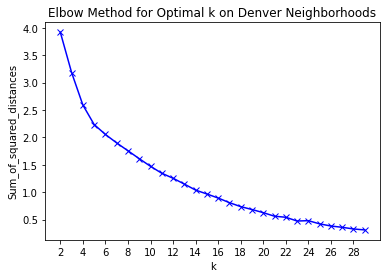

In [38]:
den_grouped_clustering = den_grouped.drop('Neighborhood', 1)

Sum_of_squared_distances = []

K = range(2,30)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(den_grouped_clustering)
    Sum_of_squared_distances.append(km.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method for Optimal k on Denver Neighborhoods')
plt.xticks(np.arange(2, 30, step=2))
plt.show()

<br><font size=3>There is not a clear elbow to define an optimal k. The additional Silhouette Method may help clarify the number of clusters that is appropriate.<br><br>

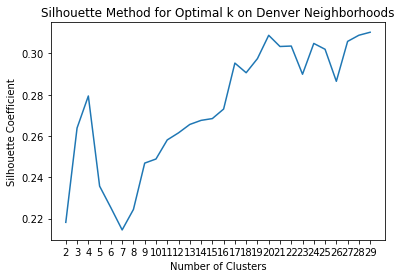

In [39]:
silhouette_coefficients = []

for k in range(2, 30):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(den_grouped_clustering)
    score = silhouette_score(den_grouped_clustering, kmeans.labels_)
    silhouette_coefficients.append(score)

plt.plot(range(2, 30), silhouette_coefficients)
plt.xticks(range(2, 30))
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Coefficient')
plt.title('Silhouette Method for Optimal k on Denver Neighborhoods')
plt.show()

<br><font size=3>The Silhouette Method shows a weak structure however between the two methods k equal to 20 is chossen. Now we run the K-means algorithm and assign the cluster number to the top venues dataframe.<br><br>

In [40]:
# set number of clusters
kclusters = 20

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(den_grouped_clustering)

# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
den_merged = den_hoods

# merge grouped to add latitude/longitude for each neighborhood
den_merged = den_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood', how = 'right')
den_merged.head()

,latitude,longitude,type,Neighborhood,locality,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,39.746655,-105.008757,neighbourhood,Auraria,Denver,1,Theater,Art Gallery,Music Venue,Art Museum,History Museum,Concert Hall,Dance Studio,Jazz Club,Museum,Rock Club
1,39.703771,-104.948625,neighbourhood,Belcaro,Denver,0,Art Gallery,Movie Theater,Music Venue,Dance Studio,Theater,Arts & Entertainment,Concert Hall,Multiplex,Museum,Outdoor Sculpture
2,39.701255,-104.966361,neighbourhood,Washington Park,Denver,8,Art Gallery,Dance Studio,Theater,Movie Theater,Rock Club,Concert Hall,Music Venue,Arts & Entertainment,Outdoor Sculpture,Indie Movie Theater
3,39.703418,-104.980665,neighbourhood,Washington Park West,Denver,14,Art Gallery,Dance Studio,Movie Theater,Rock Club,Concert Hall,Theater,Music Venue,Outdoor Sculpture,Indie Movie Theater,Jazz Club
4,39.718734,-104.981661,neighbourhood,Speer,Denver,7,Art Gallery,Theater,Concert Hall,Music Venue,Dance Studio,Museum,Outdoor Sculpture,Movie Theater,Art Museum,History Museum


<br><font size=3>Now lets take a look at the Denver map with the clustering.<br><br>

In [41]:
from branca.element import Template, MacroElement

In [43]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
colors = ['red', 'blue', 'gray', 'darkred', 'lightred', 'orange', 'beige',
    'green', 'darkgreen', 'lightgreen', 'darkblue', 'lightblue', 'purple', 
    'darkpurple', 'pink', 'cadetblue', 'lightgray','black', 'white', 'gray']

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(den_merged['latitude'], den_merged['longitude'], den_merged['Neighborhood'], den_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.Marker(
        [lat, lon],
        #radius=5,
        popup=label,
        icon=folium.Icon(color=colors[cluster])).add_to(map_clusters)
map_clusters

<br><font size="3">With all the clusters we were forced to repeat colors however we see the diversity of Denver.<br><br>
<a id = 'Clustering'></a>
<font size="3">__4.2 City Clustering__<br><br>Lets begin the same proccess on the merged cities dataset.<br><br>

In [44]:
# one hot encoding
hoods_onehot = pd.get_dummies(hoods_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
hoods_onehot['Neighborhood'] = hoods_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [hoods_onehot.columns[-1]] + list(hoods_onehot.columns[:-1])
hoods_onehot = hoods_onehot[fixed_columns]

hoods_grouped = hoods_onehot.groupby('Neighborhood').mean().reset_index()

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = hoods_grouped['Neighborhood']

for ind in np.arange(hoods_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(hoods_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.tail()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
91,West Colfax,Museum,Theater,Art Gallery,Dance Studio,Exhibit,Movie Theater,History Museum,Indie Theater,Comedy Club,Arts & Entertainment
92,West Highland,Art Gallery,Theater,Museum,Music Venue,Dance Studio,Exhibit,Movie Theater,Multiplex,Indie Movie Theater,Comedy Club
93,Westwood,Dance Studio,Memorial Site,Movie Theater,Museum,Disc Golf,Piano Bar,Art Gallery,Theater,Indie Theater,Circus
94,Whittier,Zoo Exhibit,Music Venue,Theater,History Museum,Science Museum,Rock Club,Jazz Club,Art Gallery,Concert Hall,Dance Studio
95,Windsor,Dance Studio,Theater,Art Gallery,Disc Golf,History Museum,Museum,Music Venue,Indie Movie Theater,Exhibit,Escape Room


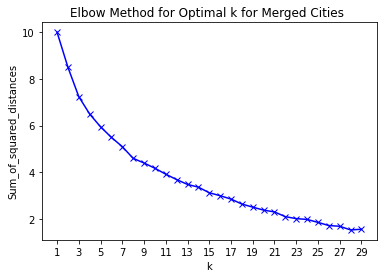

In [45]:
hoods_grouped_clustering = hoods_grouped.drop('Neighborhood', 1)

Sum_of_squared_distances = []

K = range(1,30)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(hoods_grouped_clustering)
    Sum_of_squared_distances.append(km.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method for Optimal k for Merged Cities ')
plt.xticks(np.arange(1, 30, step=2))
plt.show()

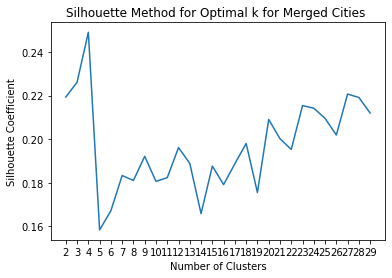

In [48]:
silhouette_coefficients = []

for k in range(2, 30):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(hoods_grouped_clustering)
    score = silhouette_score(hoods_grouped_clustering, kmeans.labels_)
    silhouette_coefficients.append(score)

plt.plot(range(2, 30), silhouette_coefficients)
plt.xticks(range(2, 30))
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Coefficient')
plt.title('Silhouette Method for Optimal k for Merged Cities ')
plt.show()

<br><font size=3>Again we see the optimazation methods show a weak structure however between the two methods k of 4 is chossen.<br><br>

In [49]:
# set number of clusters
kclusters = 4

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(hoods_grouped_clustering)

# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
merged = hoods

# merge data to add latitude/longitude for each neighborhood
merged = merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood', how = 'right')
merged.head()

,latitude,longitude,type,Neighborhood,locality,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,39.746655,-105.008757,neighbourhood,Auraria,Denver,2,Theater,Art Gallery,Music Venue,Art Museum,History Museum,Jazz Club,Rock Club,Dance Studio,Comedy Club,Concert Hall
1,39.703771,-104.948625,neighbourhood,Belcaro,Denver,2,Art Gallery,Movie Theater,Music Venue,Dance Studio,Theater,Arts & Entertainment,Public Art,Concert Hall,Museum,Outdoor Sculpture
2,39.701255,-104.966361,neighbourhood,Washington Park,Denver,2,Art Gallery,Dance Studio,Theater,Rock Club,Concert Hall,Movie Theater,Music Venue,Arts & Entertainment,Outdoor Sculpture,Performing Arts Venue
3,39.703418,-104.980665,neighbourhood,Washington Park West,Denver,2,Art Gallery,Dance Studio,Rock Club,Movie Theater,Theater,Concert Hall,Jazz Club,Arts & Entertainment,Public Art,Indie Movie Theater
4,39.718734,-104.981661,neighbourhood,Speer,Denver,2,Art Gallery,Theater,Concert Hall,Music Venue,Dance Studio,Outdoor Sculpture,Movie Theater,Museum,History Museum,Art Museum


In [50]:
address = 'USA'

geolocator = Nominatim(user_agent="123")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

# create map
map_clusters_m = folium.Map(location=[latitude, longitude], zoom_start=5)

# set color scheme for the clusters
colors = ['black', 'red', 'blue', 'green']

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(merged['latitude'], merged['longitude'], merged['Neighborhood'], merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.Marker(
        [lat, lon],
        popup = label,
        icon = folium.Icon(color = colors[cluster])).add_to(map_clusters_m)
folium.TileLayer('cartodbpositron').add_to(map_clusters_m)    

In [51]:
# Code was modified from Khushali Thakkar on Github
template = """
{% macro html(this, kwargs) %}

<!doctype html>
<html lang="en">
<head>
  <meta charset="utf-8">
  <meta name="viewport" content="width=device-width, initial-scale=1">
  <title>jQuery UI Draggable - Default functionality</title>
  <link rel="stylesheet" href="//code.jquery.com/ui/1.12.1/themes/base/jquery-ui.css">

  <script src="https://code.jquery.com/jquery-1.12.4.js"></script>
  <script src="https://code.jquery.com/ui/1.12.1/jquery-ui.js"></script>
  
  <script>
  $( function() {
    $( "#maplegend" ).draggable({
                    start: function (event, ui) {
                        $(this).css({
                            right: "auto",
                            top: "auto",
                            bottom: "auto"
                        });
                    }
                });
});

  </script>
</head>
<body>

 
<div id='maplegend' class='maplegend' 
    style='position: absolute; z-index:9999; border:2px solid grey; background-color:rgba(255, 255, 255, 0.8);
     border-radius:6px; padding: 10px; font-size:14px; right: 20px; bottom: 20px;'>
     
<div class='legend-title'>Legend: Cluster and Color</div>
<div class='legend-scale'>
  <ul class='legend-labels'>
    <li><span style='background:black;opacity:0.7;'></span>0 Black</li>
    <li><span style='background:red;opacity:0.7;'></span>1 Red</li>
    <li><span style='background:blue;opacity:0.7;'></span>2 Blue</li>
    <li><span style='background:green;opacity:0.7;'></span>3 Green</li>
    

  </ul>
</div>
</div>
 
</body>
</html>

<style type='text/css'>
  .maplegend .legend-title {
    text-align: left;
    margin-bottom: 5px;
    font-weight: bold;
    font-size: 90%;
    }
  .maplegend .legend-scale ul {
    margin: 0;
    margin-bottom: 5px;
    padding: 0;
    float: left;
    list-style: none;
    }
  .maplegend .legend-scale ul li {
    font-size: 80%;
    list-style: none;
    margin-left: 0;
    line-height: 18px;
    margin-bottom: 2px;
    }
  .maplegend ul.legend-labels li span {
    display: block;
    float: left;
    height: 16px;
    width: 30px;
    margin-right: 5px;
    margin-left: 0;
    border: 1px solid #999;
    }
  .maplegend .legend-source {
    font-size: 80%;
    color: #777;
    clear: both;
    }
  .maplegend a {
    color: #777;
    }
</style>
{% endmacro %}"""

macro = MacroElement()
macro._template = Template(template)

map_clusters_m.get_root().add_child(macro)

map_clusters_m

<br><font size=3>As we scroll around we can see that the clustering of the two cities appear similar. To take a closer look lets quantify the clusters by city. Here we generate a table to count the clusters, the breakdown by each city, and there percent difference between Denver and Jacksonville.<br><br>

In [52]:
df_city_cl = merged.groupby(['locality','Cluster Labels']).size().reset_index(name="Frequency")
df_city_cl = df_city_cl.pivot(index='Cluster Labels',columns='locality',values='Frequency').reset_index()
df_city_cl = df_city_cl.fillna(0).astype(int)
df_city_cl.columns.name = None
df_city_cl['Percent_Denver'] = df_city_cl.apply(lambda row: round(row.Denver / df_city_cl['Denver'].sum() * 100), axis=1)
df_city_cl['Percent_Jacksonville'] = df_city_cl.apply(lambda row: round(row.Jacksonville / df_city_cl['Jacksonville'].sum()  * 100), axis=1)
df_city_cl['Difference'] = df_city_cl.apply(lambda row: row.Percent_Denver - row.Percent_Jacksonville, axis=1)
df_city_cl.astype(int)
print(df_city_cl.to_markdown())

|    |   Cluster Labels |   Denver |   Jacksonville |   Percent_Denver |   Percent_Jacksonville |   Difference |
|---:|-----------------:|---------:|---------------:|-----------------:|-----------------------:|-------------:|
|  0 |                0 |        4 |              8 |                6 |                     26 |          -20 |
|  1 |                1 |       13 |              2 |               20 |                      6 |           14 |
|  2 |                2 |       40 |             13 |               61 |                     42 |           19 |
|  3 |                3 |        9 |              8 |               14 |                     26 |          -12 |


<br><font size=3>Here we see a difference in the distrubutions of the clusters between the cities.<br><br>
<a id = 'Trucks'></a>
<font size="3">__4.3 Food Trucks__<br><br> One final question to address is where in Denver are food trucks located? Which clusters have a higher density of bussinesses. Here we generate an addtional dataset using __Foursquare__ to find Food Trucks and map them to the Denver neighborhoods.<br><br>

In [53]:
den_trucks = getNearbyVenues(names = den_hoods['Neighborhood'],
                                   latitudes = den_hoods['latitude'],
                                   longitudes = den_hoods['longitude'],
                                   CatID = '4bf58dd8d48988d1cb941735')

Number of locations searched 66


In [54]:
df_trucks = pd.DataFrame(den_trucks.groupby('Neighborhood')['Venue'].nunique()).reset_index()
df_trucks = df_trucks.rename(columns = {"Venue":"Trucks"})
df_trucks = pd.merge(df_trucks, den_hoods, on = 'Neighborhood', how = 'right').reset_index(drop = True)
df_trucks[['Trucks']] = df_trucks[['Trucks']].apply(lambda x: x / x.max(), axis=0)
df_trucks.head()
den_trucks_arr = df_trucks[['latitude', 'longitude', 'Trucks']].to_numpy()

In [55]:
from folium import plugins

In [56]:
address = 'City Park West, Denver, USA'

geolocator = Nominatim(user_agent="123")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

# create map
map_clusters_m_hm = folium.Map(location=[latitude, longitude], zoom_start=12)

# set color scheme for the clusters
colors = ['black', 'red', 'blue', 'green']

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(merged['latitude'], merged['longitude'], merged['Neighborhood'], merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.Marker(
        [lat, lon],
        radius=4,
        icon=folium.Icon(color=colors[cluster]),
        popup=label).add_to(map_clusters_m_hm)
folium.TileLayer('cartodbpositron').add_to(map_clusters_m_hm)

template = """
{% macro html(this, kwargs) %}

<!doctype html>
<html lang="en">
<head>
  <meta charset="utf-8">
  <meta name="viewport" content="width=device-width, initial-scale=1">
  <title>jQuery UI Draggable - Default functionality</title>
  <link rel="stylesheet" href="//code.jquery.com/ui/1.12.1/themes/base/jquery-ui.css">

  <script src="https://code.jquery.com/jquery-1.12.4.js"></script>
  <script src="https://code.jquery.com/ui/1.12.1/jquery-ui.js"></script>
  
  <script>
  $( function() {
    $( "#maplegend" ).draggable({
                    start: function (event, ui) {
                        $(this).css({
                            right: "auto",
                            top: "auto",
                            bottom: "auto"
                        });
                    }
                });
});

  </script>
</head>
<body>

 
<div id='maplegend' class='maplegend' 
    style='position: absolute; z-index:9999; border:2px solid grey; background-color:rgba(255, 255, 255, 0.8);
     border-radius:6px; padding: 10px; font-size:14px; right: 20px; bottom: 20px;'>
     
<div class='legend-title'>Legend: Cluster and Color</div>
<div class='legend-scale'>
  <ul class='legend-labels'>
    <li><span style='background:black;opacity:0.7;'></span>0 Black</li>
    <li><span style='background:red;opacity:0.7;'></span>1 Red</li>
    <li><span style='background:blue;opacity:0.7;'></span>2 Blue</li>
    <li><span style='background:green;opacity:0.7;'></span>3 Green</li>
   

  </ul>
</div>
</div>
 
</body>
</html>

<style type='text/css'>
  .maplegend .legend-title {
    text-align: left;
    margin-bottom: 5px;
    font-weight: bold;
    font-size: 90%;
    }
  .maplegend .legend-scale ul {
    margin: 0;
    margin-bottom: 5px;
    padding: 0;
    float: left;
    list-style: none;
    }
  .maplegend .legend-scale ul li {
    font-size: 80%;
    list-style: none;
    margin-left: 0;
    line-height: 18px;
    margin-bottom: 2px;
    }
  .maplegend ul.legend-labels li span {
    display: block;
    float: left;
    height: 16px;
    width: 30px;
    margin-right: 5px;
    margin-left: 0;
    border: 1px solid #999;
    }
  .maplegend .legend-source {
    font-size: 80%;
    color: #777;
    clear: both;
    }
  .maplegend a {
    color: #777;
    }
</style>
{% endmacro %}"""

macro = MacroElement()
macro._template = Template(template)

map_clusters_m_hm.get_root().add_child(macro)
map_clusters_m_hm.add_child(plugins.HeatMap(den_trucks_arr, radius = 30, max_zoom = 12, min_opacity = 0.3, blur = 20))

<br><font size=3>Here we can see that the food trucks are ubiquitous however concentrated in clusters 1 and 2.<br><br> 

<a id = 'Discussion'></a>
<font size="3">__5. Discussion__<br><br>Through our analysis we were able to cluster the Denver and Jacksonville neighborhood venue datasets for use in determining similar characteristics within neighborhoods. Beginning with Denver as a psedo-test set, we used the K-means algorithm to cluster the neighborhoods by venue categories. The categories for this analysis were chosen for their ideal settings for food trucks. A k of 20 was determined optimal with the Elbow and Silhouette Methods, however, both methods were not definitive. The Elbow Method did not have a clear break point and the exponential decay curve had a steep linear decline. Additionally, the Silhouette Coefficient was low suggesting that little to no structure in the dataset. There was greater confidence in the K-means algorithm after the clusters were mapped. Based on geolocation and an understanding of the layout of Denver the clusters appeared to have some validity. <br><br>Merging the Denver and Jacksonville datasets and utilizing the K-means algorithm had similar problems as with the Denver only dataset. Both the Elbow and Silhouette Methods showed little improvement in defining clusters. One reason for this may be the number of neighborhoods was too large with many different venue categories leading to high dimensionality, which K-means has problems with. Using principal component analysis to reduce the dimensions prior to clustering may improve results but was not performed here. A k of four was chosen as the optimal number of clusters. Visually the two cities appeared to be dominated by the same clusters. The majority of neighborhoods in both cities were in clusters 2. The greatest difference between the cities was observed in clusters 0 and 1. Denver lacking cluster 0 and Jacksonville lacking cluster 1. Finally, we overlay a density heatmap of numbers of food trucks in Denver. It shows that food trucks are associated with clusters 1 and 2. The strongest with cluster 2. We can see that cluster 2 dominates Jacksonville as well. Interestingly, it was found that every Denver neighborhood had at least a food truck associated with it. <br><br> Potential pitfalls in this analysis was that K-means clustering algorithm may not be the ideal choice. In both the merged and Denver datasets the cluster number optimizing methods demonstrated a lack of structure. Improving K-means clustering was proposed above, however, a density-based or t-SNE clustering may improve detection of irregular cluster shapes or address higher dimensional analysis.

<a id = 'Conclusion'></a>
<font size="3">__5. Conclusion__<br><br>The purpose of this project was to assist stakeholders in deciding to open or expand a food truck enterprise in new a locations. Using Foursquare data on venue types this analysis was able to cluster neighborhoods in Denver, a thriving food truck culture, with neighborhoods in Jacksonville. Common clusters within both cities were found and should be used as a starting point to determine if the target location is an ideal choice. Additional factors that may be considered in future analysis are population density, social-economics status, and local permit costs which were outside the scope of this project.